# 安装
refer to: https://pytorch.org/get-started/locally/
## 无独立显卡

In [ ]:
conda install pytorch torchvision torchaudio cpuonly -c pytorch

## 有独立显卡

### 准备(可选)

CUDA 本身有两套 API，一套 runtime API 和一套 driver API。
- nvidia-smi显示的是 driver API，指的是当前驱动最新能够支持的 CUDA 版本，这个版本甚至与本机是否安装了 CUDA 无关；
- 而nvcc -V显示的是 runtime API，是用于安装的，并在环境变量中定义的 CUDA 的版本。  
refer to: https://fuchaojie.com/2022/06/CUDAVersion/

查看 GPU 型号

In [10]:
!lspci | grep -i nvidia

例如: 输出的结果如下:  
`0000:01:00.0 VGA compatible controller: NVIDIA Corporation Device 2204 (rev a1)`  
`0000:01:00.1 Audio device: NVIDIA Corporation Device 1aef (rev a1)`  

根据`controller: NVIDIA Corporation Device`后的<font color="red">**2204**</font>，在 https://admin.pci-ids.ucw.cz/read/PC/10de 中查找对应的 GPU 型号
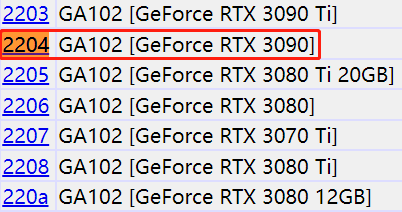
refer to: https://zhuanlan.zhihu.com/p/525475914

### 安装 CUDA driver (driver API)

In [ ]:
# 卸载(可选)
# sudo apt-get purge nvidia*
sudo apt-get --purge remove nvidia-*
sudo apt-get --purge remove libnvidia-*
# 验证是否卸载成功
nvidia-smi
# 查看可选的 NVIDIA 驱动版本
sudo apt search '^nvidia-driver-*'
# 安装
sudo apt-get install nvidia-driver-535
# 重启(必须)
reboot
# 验证驱动安装是否成功
nvidia-smi

nvidia-smi 输出详解  
refer to: https://zhuanlan.zhihu.com/p/490153818
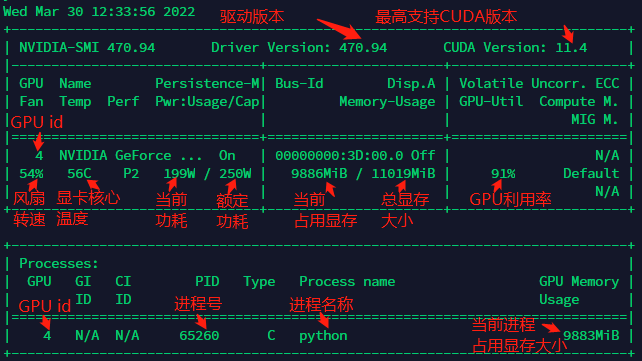

### 安装 CUDA toolkit (runtime API)
#### 选择 toolkit 版本
在 https://developer.nvidia.com/cuda-toolkit-archive 中查找, 例如
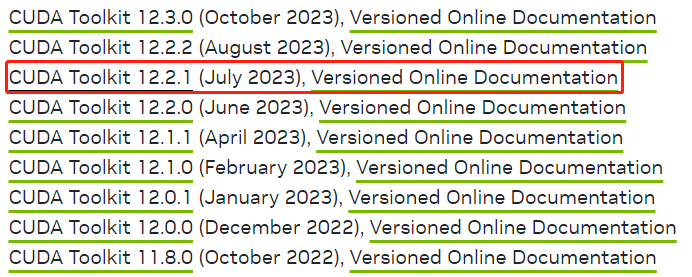

#### 查看 Ubuntu 版本(可选)

In [5]:
!cat /proc/version

Linux version 5.15.133.1-microsoft-standard-WSL2 (root@1c602f52c2e4) (gcc (GCC) 11.2.0, GNU ld (GNU Binutils) 2.37) #1 SMP Thu Oct 5 21:02:42 UTC 2023


In [7]:
!uname -a

Linux NB-qj00182 5.15.133.1-microsoft-standard-WSL2 #1 SMP Thu Oct 5 21:02:42 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [6]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.4 LTS
Release:	20.04
Codename:	focal


#### 下载安装
refer to:
- https://developer.nvidia.com/cuda-toolkit-archive
- https://blog.csdn.net/Sihang_Xie/article/details/127347139
- https://www.cherryservers.com/blog/install-cuda-ubuntu

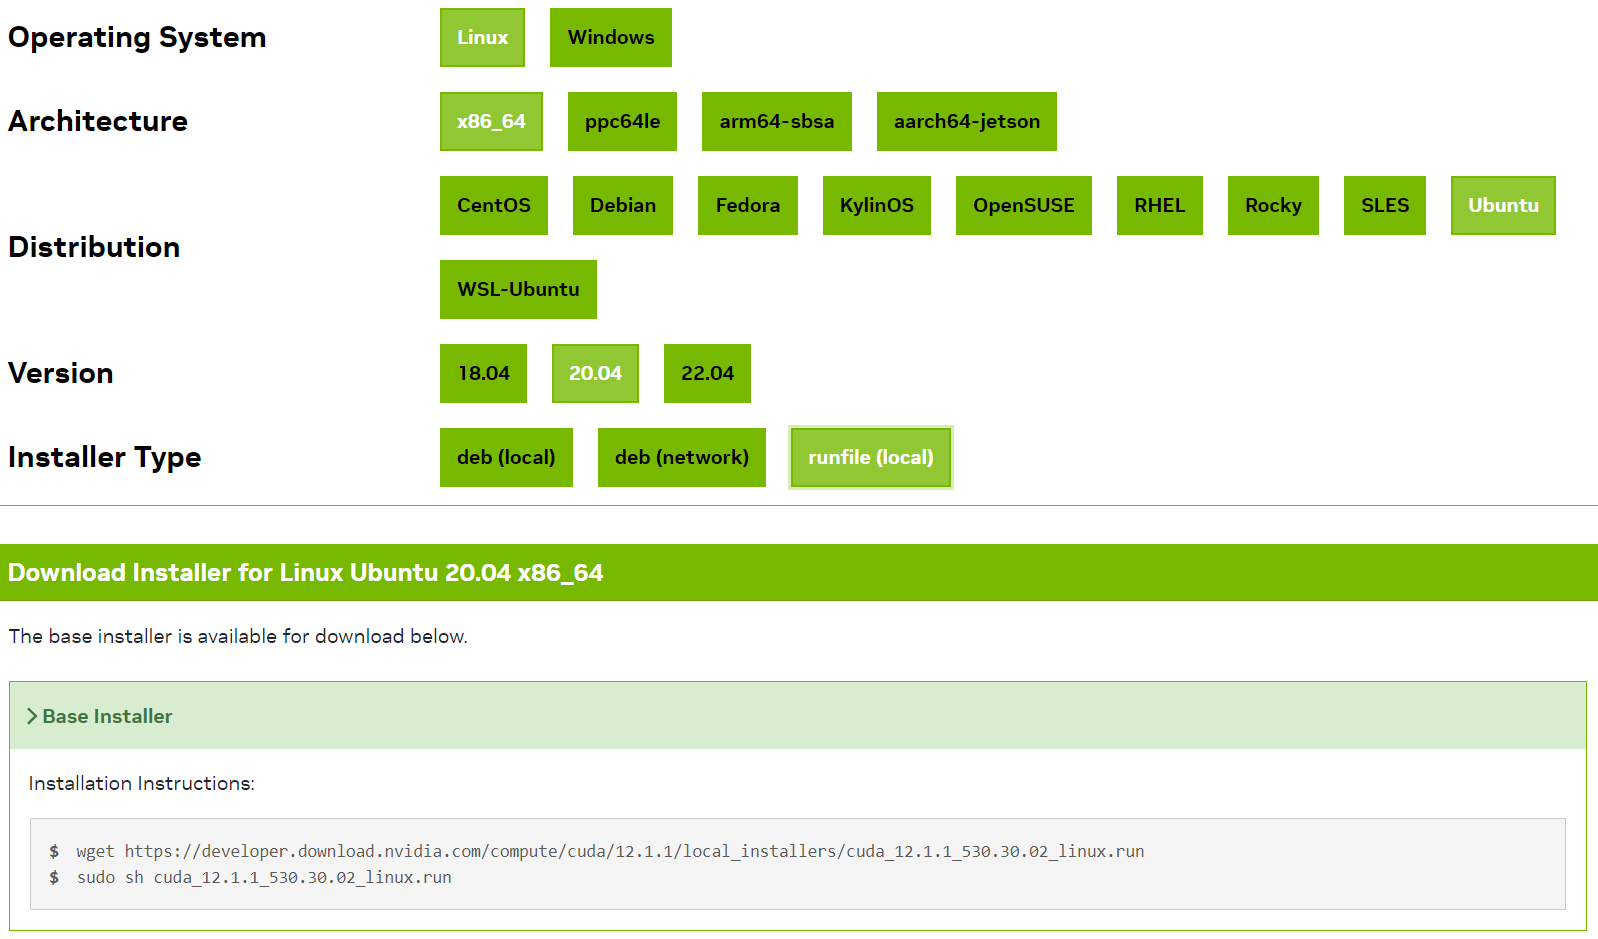

In [ ]:
# 下载
wget https://developer.download.nvidia.com/compute/cuda/12.1.1/local_installers/cuda_12.1.1_530.30.02_linux.run

# 安装
sudo sh cuda_12.1.1_530.30.02_linux.run

# 配置环境变量
sudo vim ~/.bashrc

# 末尾追加
export PATH=/usr/local/cuda-12.1/bin${PATH:+:${PATH}}
export LD_LIBRARY_PATH=/usr/local/cuda-12.1/lib64${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
export CUDA_HOME=/usr/local/cuda-12.1

# 更新系统环境
source ~/.bashrc

# 验证 toolkit
nvcc --version

### 安装pytorch
refer to: https://pytorch.org/get-started/locally/
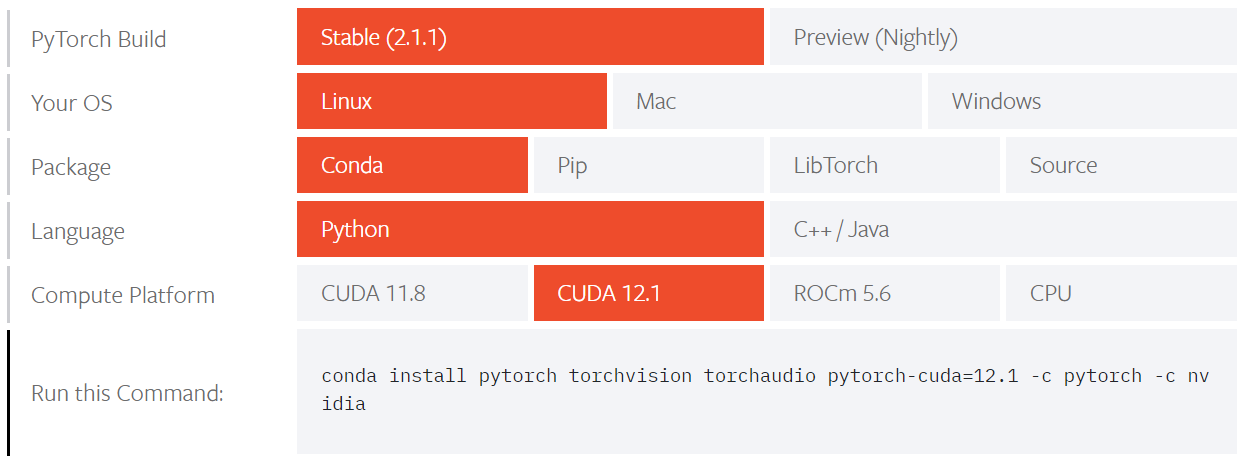

In [ ]:
conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia

In [15]:
# python 验证
import torch
if torch.cuda.is_available():
    torch.version.cuda

### todo: about WSL2
https://developer.nvidia.com/cuda/wsl

# md -> ipynb
For more usage, refer to: https://blog.csdn.net/weixin_54227557/article/details/126224621

In [ ]:
# conda install notedown 安装
notedown a.md > a.ipynb

# merge mul ipynb

In [ ]:
# pip install nbmerge 安装
nbmerge a.ipynb b.ipynb c.ipynb -o d.ipynb
nbmerge a.ipynb b.ipynb c.ipynb > d.ipynb

# 术语

中文 | 英语
:- | :-
鞍点 | saddle point
变换 | transform
编码器 | encoder
标签 | label
步幅 | stride
参数 | parameter
长短期记忆网络 | long short-term memory (LSTM)
超参数 | hyperparameter
层序softmax | hierarchical softmax
查准率 | precision
成本 | cost
词表 | vocabulary
词嵌入 | word embedding
词向量 | word vector
词元 | token
词元分析器 | tokenizer
词元化 | tokenize
汇聚层 | pooling layer
稠密 | dense
大小 | size
导入 | import
轮 | epoch
暂退法 | dropout
动量法 | momentum (method)
独立同分布 | independent and identically distributed (i.i.d.)
端到端 | end-to-end
多层感知机 | multilayer perceptron
多头注意力 | multi-head attention
二元分类 | binary classification
二元 | bigram
子采样 | subsample
发散 | diverge
泛化 | generalization
泛化误差 | generalization error
方差 | variance
分类 | classification
分类器 | classifier
负采样 | negative sampling
感受野 | receptive field
格拉姆矩阵 | Gram matrix
共现 | co-occurrence
广播 | broadcast
规范化 | normalization
过拟合 | overfitting
核回归 | kernel regression
恒等映射 | identity mapping
假设 | hypothesis
基准 | baseline
激活函数 | activation function
解码器 | decoder
近似法 | approximate method
经验风险最小化 | empirical risk minimization
局部最小值 | local minimum
卷积核 | convolutional kernel
卷积神经网络 | convolutional neural network
决策边界 | decision boundary
均值 | mean
均方误差 | mean squared error
均匀采样 | uniform sampling
块 | block
困惑度 | perplexity
拉普拉斯平滑 | Laplace smoothing
连结 | concatenate
类 | class
交叉熵 | cross-entropy
连续词袋 | continous bag-of-words (CBOW)
零张量 | zero tensor
流水线 | pipeline
滤波器 | filter
门控循环单元 | gated recurrent units (GRU)
目标检测 | object detection
偏置 | bias
偏导数 | partial derivative
偏移量 | offset
批量 | batch
齐普夫定律 | Zipf's law
欠拟合 | underfitting
情感分析 | sentiment analysis
全连接层 | fully-connected layer
权重 | weight
三元 | trigram
上采样 | upsample
上下文变量 | context variable
上下文窗口 | context window
上下文词 | context word
上下文向量 | context vector
实例/示例 | instance
收敛 | converge
属性 | property
数值方法 | numerical method
数据集 | dataset
数据示例 | data instance
数据样例 | data example
顺序分区 | sequential partitioning
softmax回归 | softmax regression
随机采样 | random sampling
损失函数 | loss function
双向循环神经网络 | bidirectional recurrent neural network
特征 | feature
特征图 | feature map
特征值 | eigenvalue
梯度 | gradient
梯度裁剪 | gradient clipping
梯度消失 | vanishing gradients
填充 | padding
跳元模型 | skip-gram model
调参 | tune hyperparameter
停用词 | stop words
通道 | channel
凸优化 | convex optimization
图像 | image
未知词元 | unknown token
无偏估计 | unbiased estimate
误差 | error
小批量 | minibatch
小批量梯度 | minibatch gradient
线性模型 | linear model
线性回归 | linear regression
协同过滤 | collaborative filtering
学习率 | learning rate
训练误差 | training error
循环神经网络 | recurrent neural network (RNN)
样例 | example
一维梯度下降 | gradient descent in one-dimensional space
一元 | unigram
隐藏变量 | hidden variable
隐藏层 | hidden layer
优化器 | optimizer
语料库 | corpus
运算符 | operator
自注意力 | self-attention
真实值 | ground truth
指标 | metric
支持向量机 | support vector machine
注意力机制 | attention mechanism
注意力模型 | attention model
注意力提示 | attention cue
准确率/精度 | accuracy